# BayesianReal

Choose 3 datasets which are available on e.g., UCI repository https://archive.ics.
uci.edu/ml/index.php or OpenML repository https://www.openml.org/ related to
binary classification problem. Please only focus on datasets with numerical features.

Compare LDA, QDA, and NB. Split data into training set and test set. Train the
model on the train set and compute accuracy on the test set. Repeat the experiment
for different train/test splits and generate boxplots showing the values of accuracy for
each method. Save the results for three datasets in the file BayesianReal.pdf

Datasets: 

* Skin Segmentation
* Blood Transfusion Service Center
* Sepsis Survival Minimal Clinical Records


In [1]:
from ucimlrepo import fetch_ucirepo  
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from LDA import LDA
from QDA import QDA
from NB import NB

In [2]:
def get_results(X, y, nr_experiments):
    results = {"Experiment": [], "Model": [], "Accuracy": []} 
    model_names = {"LDA": LDA(), "QDA": QDA(), "NB": NB()}

    for experiment in range(nr_experiments):             
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

            for model_name in model_names.keys(): 
                model = model_names[model_name]
                model.fit(X_train, y_train)
                model_predictions = model.predict(X_test)
                model_acc = accuracy_score(y_test, model_predictions)
                results["Experiment"].append(experiment)
                results["Model"].append(model_name)
                results["Accuracy"].append(model_acc)

    return pd.DataFrame(results)

In [3]:
def boxplot_results(results_df, title): 
    plt.figure(figsize=(8, 6))    
    
    results_df[["Accuracy", "Model"]].boxplot("Accuracy", "Model")

    plt.title(title)
    plt.suptitle("")
    plt.show()

# Skin Segmentation 
https://archive.ics.uci.edu/dataset/229/skin+segmentation

In [4]:
sample_size = 2000
# fetch dataset 
skin_segmentation = fetch_ucirepo(id=229) 
  
# data (as pandas dataframes) 
X_ss = skin_segmentation.data.features 
y_ss = skin_segmentation.data.targets 

indices = np.random.choice(len(X_ss), sample_size, replace=False)  # Random indices
X_ss = X_ss.iloc[indices]
y_ss = y_ss.iloc[indices].to_numpy()
y_ss = y_ss - 1

# metadata 
print(skin_segmentation.metadata) 
  
# variable information 
print(skin_segmentation.variables) 

print(f"Shape: {X_ss.shape}")
print(f"Labels: {np.unique(y_ss)}")


{'uci_id': 229, 'name': 'Skin Segmentation', 'repository_url': 'https://archive.ics.uci.edu/dataset/229/skin+segmentation', 'data_url': 'https://archive.ics.uci.edu/static/public/229/data.csv', 'abstract': 'The Skin Segmentation dataset is constructed over B, G, R color space. Skin and Nonskin dataset is generated using skin textures from face images of diversity of age, gender, and race people.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Univariate'], 'num_instances': 245057, 'num_features': 3, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5T30C', 'creators': ['Rajen Bhatt', 'Abhinav Dhall'], 'intro_paper': None, 'additional_info': {'summary': 'The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, midd

In [5]:
res_ss = get_results(X_ss, y_ss, 10)
res_ss.head()

,Experiment,Model,Accuracy
0,0,LDA,0.936
1,0,QDA,0.998
2,0,NB,0.935
3,1,LDA,0.920
4,1,QDA,0.998


<Figure size 800x600 with 0 Axes>

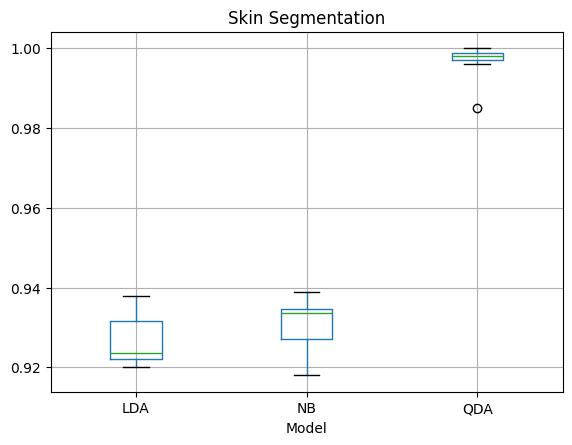

In [6]:
boxplot_results(res_ss, "Skin Segmentation")

# Blood Transfusion Service Center
https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
blood_transfusion_service_center = fetch_ucirepo(id=176) 
  
# data (as pandas dataframes) 
X_btsc = blood_transfusion_service_center.data.features 
y_btsc = blood_transfusion_service_center.data.targets 
y_btsc = y_btsc.to_numpy().flatten()
  
# metadata 
print(blood_transfusion_service_center.metadata) 
  
# variable information 
print(blood_transfusion_service_center.variables) 

print(f"Shape: {X_btsc.shape}")
print(f"Labels: {np.unique(y_btsc)}")


{'uci_id': 176, 'name': 'Blood Transfusion Service Center', 'repository_url': 'https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center', 'data_url': 'https://archive.ics.uci.edu/static/public/176/data.csv', 'abstract': 'Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem. ', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 748, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Donated_Blood'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C5GS39', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 434, 'type': 'NATIVE', 'title': 'Knowledge discovery on RFM model using Bernoulli sequence', 'authors': 'I. Yeh, K. Yang, Tao-Ming Ting', 'venue': 'Expert systems with applications', 'year': 2009, 'journa

In [8]:
X_btsc.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [9]:
res_btsc = get_results(X_btsc, y_btsc, 10)
res_btsc.head()

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Experiment,Model,Accuracy
0,0,LDA,0.398396
1,0,QDA,0.639037
2,0,NB,0.762032
3,1,LDA,0.336898
4,1,QDA,0.652406


<Figure size 800x600 with 0 Axes>

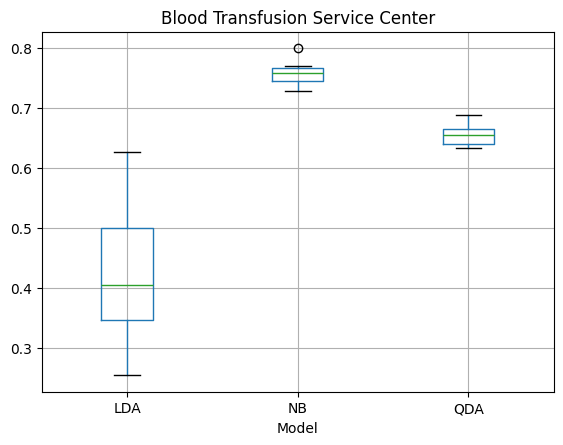

In [10]:
boxplot_results(res_btsc, "Blood Transfusion Service Center")

# Sepsis Survival Minimal Clinical Records

https://archive.ics.uci.edu/dataset/827/sepsis+survival+minimal+clinical+records

In [11]:
sample_size = 20000
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827) 
  
# data (as pandas dataframes) 
X_ssmcr = sepsis_survival_minimal_clinical_records.data.features 
y_ssmcr = sepsis_survival_minimal_clinical_records.data.targets 

indices = np.random.choice(len(X_ssmcr), sample_size, replace=False)  # Random indices
X_ssmcr = X_ssmcr.iloc[indices]
y_ssmcr = y_ssmcr.iloc[indices].to_numpy().flatten()

# metadata 
print(sepsis_survival_minimal_clinical_records.metadata) 
  
# variable information 
print(sepsis_survival_minimal_clinical_records.variables) 

print(f"Shape: {X_ssmcr.shape}")
print(f"Labels: {np.unique(y_ssmcr)}")


{'uci_id': 827, 'name': 'Sepsis Survival Minimal Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/827/sepsis+survival+minimal+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/827/data.csv', 'abstract': 'The dataset consists of 110,204 admissions of 84,811 hospitalized subjects between 2011 and 2012 in Norway who were diagnosed with infections, systemic inflammatory response syndrome, sepsis by causative microbes, or septic shock.  The prediction task is to determine whether a patient survived or is deceased at a time of about 9 days after collecting their medical record at the hospital.\n\nThis is an important prediction problem in clinical medicine. Sepsis is a life-threatening condition triggered by an immune overreaction to infection, leading to organ failure or even death. Sepsis is associated with immediate death risk, often killing patients within one hour. This renders many laboratory tests and hospital analyses impractical for t

In [12]:
res_ssmcr = get_results(X_ssmcr, y_ssmcr, 10)
res_ssmcr.head()

,Experiment,Model,Accuracy
0,0,LDA,0.1271
1,0,QDA,0.4755
2,0,NB,0.9270
3,1,LDA,0.1293
4,1,QDA,0.4736


<Figure size 800x600 with 0 Axes>

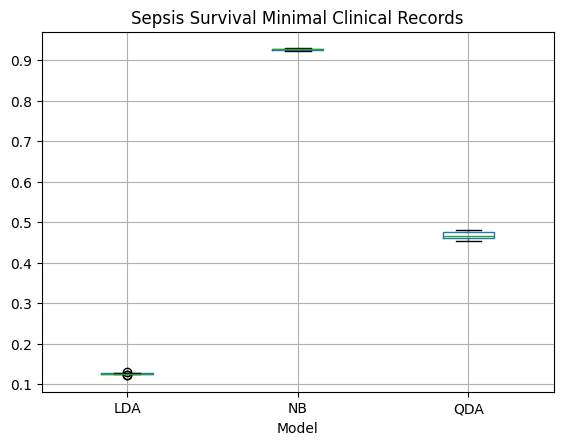

In [13]:
boxplot_results(res_ssmcr, "Sepsis Survival Minimal Clinical Records")